In [1]:
!git clone https://github.com/jgscott/STA380.git

Cloning into 'STA380'...
remote: Enumerating objects: 35426, done.
remote: Counting objects: 100% (8401/8401), done.
remote: Compressing objects: 100% (7057/7057), done.
remote: Total 35426 (delta 1259), reused 8347 (delta 1239), pack-reused 27025
Receiving objects: 100% (35426/35426), 346.18 MiB | 17.39 MiB/s, done.
Resolving deltas: 100% (1262/1262), done.
Updating files: 100% (35749/35749), done.


In [2]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("STA380/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("STA380/data/ReutersC50/C50test")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:

# Helper function to tokenize ,remove space, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words



Most common words across the training set:
said: 19856
's: 14872
``: 13837
'': 13757
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


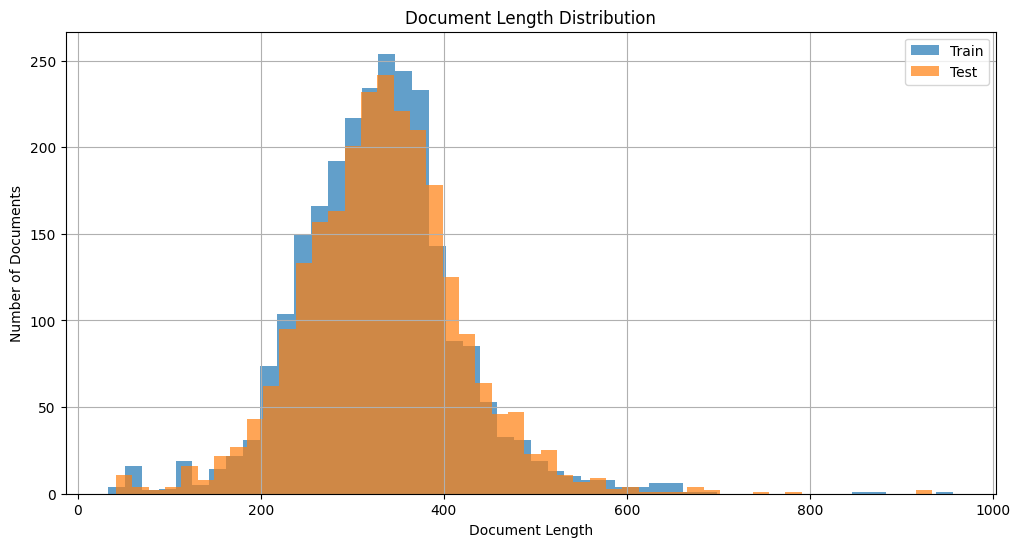

In [5]:
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'where

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns
import random

unique_authors = list(set(train_labels))

#PCA
pca = PCA()
reduced_data_pca = pca.fit_transform(train_dtm.toarray())  # Convert sparse matrix to dense matrix


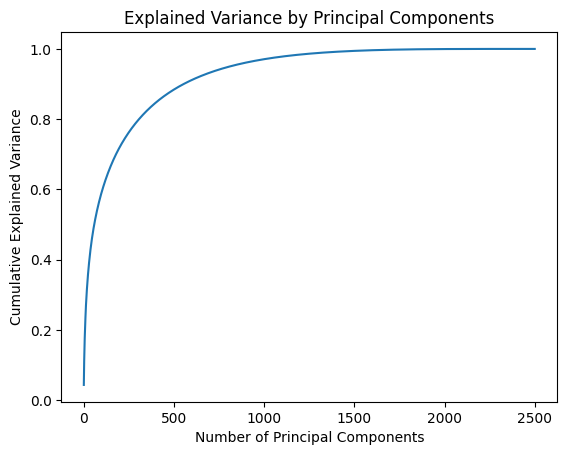

In [8]:
mod_pca = pca.fit(reduced_data_pca)
# pred_pca = reduced_data_pca.transform(test_dtm)

# Plot the explained variance by each principal component
plt.plot(np.cumsum(mod_pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

### Insight

500 Principal components explain more than 80% of variability, hence picking n_components=500

In [9]:
pca = PCA(n_components=500)

# Fit and transform the training data
reduced_data_pca = pca.fit_transform(train_dtm.toarray())

# Transform the test data using the same PCA transformation
reduced_test_dtm = pca.transform(test_dtm.toarray())

In [10]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Define a range of values for n_estimators to try
param_grid = {'n_estimators': [50, 100, 150, 200, 250]}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the reduced training data
grid_search.fit(reduced_data_pca, train_labels)

# Get the best parameter values and corresponding accuracy score
best_n_estimators = grid_search.best_params_['n_estimators']
best_accuracy = grid_search.best_score_

print(f"Best n_estimators: {best_n_estimators}")
print(f"Best accuracy: {best_accuracy}")


Best n_estimators: 250
Best accuracy: 0.7375999999999999


In [11]:
random_forest = RandomForestClassifier(n_estimators=250, random_state=42)

# Fit the classifier on the training data
random_forest.fit(reduced_data_pca, train_labels)

# Transform the test data using the same PCA transformation
reduced_test_dtm = pca.transform(test_dtm.toarray())

# Make predictions on the test data
predictions = random_forest.predict(reduced_test_dtm)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.5592
Classification Report:
                    precision    recall  f1-score   support

    AaronPressman       0.73      0.74      0.73        50
       AlanCrosby       0.75      0.60      0.67        50
   AlexanderSmith       0.55      0.12      0.20        50
  BenjaminKangLim       0.35      0.30      0.32        50
    BernardHickey       0.55      0.62      0.58        50
      BradDorfman       0.43      0.50      0.46        50
 DarrenSchuettler       0.50      0.22      0.31        50
      DavidLawder       0.74      0.28      0.41        50
    EdnaFernandes       0.25      0.32      0.28        50
      EricAuchard       0.35      0.28      0.31        50
   FumikoFujisaki       0.86      0.86      0.86        50
   GrahamEarnshaw       0.76      0.68      0.72        50
 HeatherScoffield       0.33      0.32      0.33        50
       JanLopatka       0.62      0.64      0.63        50
    JaneMacartney       0.12      0.06      0.08        50
     JimGilchr

In [12]:
#KNN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define a range of values for n_neighbors to try
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the reduced training data
grid_search.fit(reduced_data_pca, train_labels)

# Get the best parameter value and corresponding accuracy score
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best accuracy: {best_accuracy}")


Best n_neighbors: 3
Best accuracy: 0.6096


In [13]:

knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the reduced training data
knn.fit(reduced_data_pca, train_labels)
knn_predictions = knn.predict(reduced_test_dtm)
# Evaluate the KNN model
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_classification_rep = classification_report(test_labels, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy}")
print("KNN Classification Report:\n", knn_classification_rep)

KNN Accuracy: 0.4368
KNN Classification Report:
                    precision    recall  f1-score   support

    AaronPressman       0.41      0.70      0.52        50
       AlanCrosby       0.44      0.66      0.53        50
   AlexanderSmith       0.45      0.28      0.35        50
  BenjaminKangLim       0.23      0.28      0.25        50
    BernardHickey       0.15      0.58      0.23        50
      BradDorfman       0.21      0.66      0.32        50
 DarrenSchuettler       0.45      0.20      0.28        50
      DavidLawder       0.72      0.26      0.38        50
    EdnaFernandes       0.12      0.42      0.19        50
      EricAuchard       0.24      0.42      0.30        50
   FumikoFujisaki       0.93      0.52      0.67        50
   GrahamEarnshaw       0.66      0.50      0.57        50
 HeatherScoffield       0.33      0.44      0.38        50
       JanLopatka       0.62      0.46      0.53        50
    JaneMacartney       0.21      0.16      0.18        50
     J

In [14]:
#Neural Network
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Convert labels to numerical values
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=reduced_data_pca.shape[1], activation='relu'))
model.add(Dense(len(np.unique(train_labels_encoded)), activation='softmax'))  # Output layer

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(reduced_data_pca, train_labels_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test data
nn_prob_predictions = model.predict(reduced_test_dtm)
nn_predictions_encoded = np.argmax(nn_prob_predictions, axis=1)

nn_accuracy = accuracy_score(test_labels_encoded, nn_predictions_encoded)
nn_classification_rep = classification_report(test_labels_encoded, nn_predictions_encoded, target_names=label_encoder.classes_)

print(f"Neural Network Accuracy: {nn_accuracy}")
print("Neural Network Classification Report:\n", nn_classification_rep)

Epoch 1/10
79/79 [==============================] - 6s 3ms/step - loss: 3.2246 - accuracy: 0.2580
Epoch 2/10
79/79 [==============================] - 0s 3ms/step - loss: 1.2325 - accuracy: 0.7904
Epoch 3/10
79/79 [==============================] - 0s 3ms/step - loss: 0.6147 - accuracy: 0.9068
Epoch 4/10
79/79 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.9484
Epoch 5/10
79/79 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9780
Epoch 6/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9864
Epoch 7/10
79/79 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9968
Epoch 8/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.9976
Epoch 9/10
79/79 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9992
Epoch 10/10
79/79 [==============================] - 0s 1ms/step
Neural Network Accuracy: 0.6328
Neural Network Classi

### Question : 
How can we design features for each document that enhance the predictive model's performance in correctly identifying authors?

### Approach: 
We began with the tokenization process, stripping away whitespace, purging punctuation, and applying stemming. Subsequently, PCA was employed to streamline the variable count. Several modeling techniques were then utilized, encompassing KNN, Random Forest, and Neural Networks.

### Results: 
For every model executed, tables detailing various statistical metrics were generated. These tables were paired with the corresponding confusion matrix and accuracy scores.

Examining the top 5 authors from the lists produced by the three models using their f1 scores we get:

1) MatthewBunce - Appears in all three models (Random Forest, KNN, Neural Network).
2) LynnleyBrowning - Appears in all three models.
3) JimGilchrist - Appears in all three models.
4) FumikoFujisaki - Appears in both the Random Forest and Neural Network models.
5) LydiaZajc - Appears only in the Random Forest model.
6) LynneO'Donnell - Appears only in the KNN model.
7) KarlPenhaul - Appears only in the KNN model.
8) RogerFillion - Appears only in the Neural Network model.

### Analysis:

1) MatthewBunce, LynnleyBrowning, and JimGilchrist are universally recognized across all three models. This could imply that their writing styles or the content they produce is distinct and consistent, allowing each model to identify them with relative ease. These authors could be the most influential or prolific within the dataset.

2) FumikoFujisaki is recognized by both the Random Forest and Neural Network models but is missed by the KNN. This might suggest certain subtleties in her writing style or topics that the KNN model fails to capture.

3) LydiaZajc, LynneO'Donnell, KarlPenhaul, and RogerFillion are unique to their respective models. This implies that these authors might have nuanced characteristics in their writing that only one of the models could pick up effectively.

In summary, while certain authors seem to have universally distinguishable characteristics in their writings, some authors' styles or content might be better recognized by specific models. This further underscores the importance of using an ensemble of models or choosing the most appropriate model for the task when working with complex datasets.

### Conclusion: 
Here's a breakdown of the model accuracies:

1) Random Forest: 0.55
2) KNN: 0.43
3) Neural Network: 0.63

Among the trio, the Neural Network emerged as the superior performer.
